In [4]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import talib as ta
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.pyplot import plot as plot
from numpy import inf, arange, array, linspace, exp, log, power, pi, cos, sin, radians, degrees
import pandas_datareader as pdr

In [5]:
df = pd.read_csv('data/GBPUSD_5_clean.csv', header=0, index_col='time', parse_dates=True)


In [7]:
df['sma5'] = df['close'].rolling(window=5,min_periods=1, center=False).mean()
df['sma13'] = df['close'].rolling(window=13,min_periods=1, center=False).mean()
df['signal'] = np.nan
df.head(5)


,open,high,low,close,mean,distance,point,point_abs,hour,sma5,sma13,signal
time,,,,,,,,,,,,
2018-12-02 22:00:00,1.274335,1.275200,1.273350,1.27475,1.274542,0.000415,4.15,4.15,22,1.274750,1.274750,NaN
2018-12-02 22:05:00,1.274750,1.275205,1.274295,1.27470,1.274725,-0.000050,-0.50,0.50,22,1.274725,1.274725,NaN
2018-12-02 22:10:00,1.274565,1.274565,1.274110,1.27417,1.274367,-0.000395,-3.95,3.95,22,1.274540,1.274540,NaN
2018-12-02 22:15:00,1.274175,1.274310,1.273985,1.27405,1.274112,-0.000125,-1.25,1.25,22,1.274417,1.274417,NaN
2018-12-02 22:20:00,1.274045,1.274810,1.273970,1.27457,1.274307,0.000525,5.25,5.25,22,1.274448,1.274448,NaN


In [9]:
df['signal']=df['sma5'][5:]>df['sma13'][5:]
df['signal']=df['signal'].diff()
df.head(5)

#df.to_csv('data/GBPUSD_M5_signal.csv', float_format='%.6f')

,open,high,low,close,mean,distance,point,point_abs,hour,sma5,sma13,signal
time,,,,,,,,,,,,
2018-12-02 22:00:00,1.274335,1.275200,1.273350,1.27475,1.274542,0.000415,4.15,4.15,22,1.274750,1.274750,NaN
2018-12-02 22:05:00,1.274750,1.275205,1.274295,1.27470,1.274725,-0.000050,-0.50,0.50,22,1.274725,1.274725,NaN
2018-12-02 22:10:00,1.274565,1.274565,1.274110,1.27417,1.274367,-0.000395,-3.95,3.95,22,1.274540,1.274540,NaN
2018-12-02 22:15:00,1.274175,1.274310,1.273985,1.27405,1.274112,-0.000125,-1.25,1.25,22,1.274417,1.274417,NaN
2018-12-02 22:20:00,1.274045,1.274810,1.273970,1.27457,1.274307,0.000525,5.25,5.25,22,1.274448,1.274448,NaN


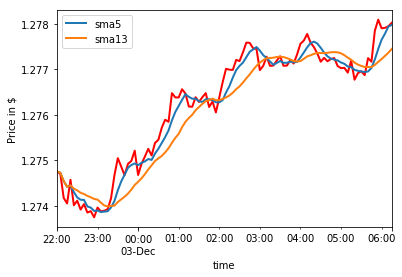

In [10]:
data = df[:100]

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Price in $')
data['close'].plot(ax=ax1, color='r', lw=2.)

data[['sma5', 'sma13']].plot(ax=ax1, lw=2.)


ax1.plot(data.loc[data.signal == 1.0].index,
         data.sma5[data.signal == 1.0],
         '^', markersize=5, color='m')

ax1.plot(data.loc[data.signal == -1.0].index,
         data.sma5[data.signal == -1.0],
         'v', markersize=2, color='k')
plt.show()
